In [1]:
import networkx as nx
# from utils_visualize import plot_graph, visualize


import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx
import networkx as nx
import pandas as pd
import torch
from sklearn.manifold import TSNE
from torch_geometric.data import Data

In [2]:
graph_model_output_fileName = "hidden_embedding_graphD04-23-2024T19_36_57.graphml"
graph_model_output_nx: nx.Graph = nx.read_graphml(graph_model_output_fileName)

In [3]:
graph_model_output_nx.nodes["5"]

{'0': 0.911608874797821, '1': 0.7488175630569458, '2': -0.9674674868583679}

In [4]:
graph_model_output_nx.is_directed()

True

In [5]:
predicted_labels = [int(max(graph_model_output_nx.nodes[node], key=graph_model_output_nx.nodes[node].get)) for node in graph_model_output_nx.nodes]

In [8]:
def visualize(h, color, epoch=None, loss=None, accuracy=None):
    plt.figure(figsize=(12,12))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        color = color.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=70, c=color, cmap="Set2", alpha=0.5)
        if epoch is not None and loss is not None and accuracy['train'] is not None and accuracy['val'] is not None:
            plt.xlabel((f'Epoch: {epoch}, Loss: {loss.item():.4f} \n'
                        f'Training Accuracy: {accuracy["train"]*100:.2f}% \n'
                        f' Validation Accuracy: {accuracy["val"]*100:.2f}%'),
                        fontsize=16)
    else:
        # pos = nx.spring_layout(h, seed=42)
        pos = nx.circular_layout(h)
        # nx.draw_networkx(h, pos=pos, with_labels=False, cmap="Set2")
        nx.draw_networkx_edges(
            h,
            pos,
            width=1,
            edge_color='black',
            # arrowsize=15,
            # min_source_margin= 14,
            # min_target_margin=14,
        )
        nx.draw_networkx_nodes(
            h,
            pos,
            node_color=color,
            cmap="Set2",
            alpha=0.7,
            node_size=200
        )

    plt.show()

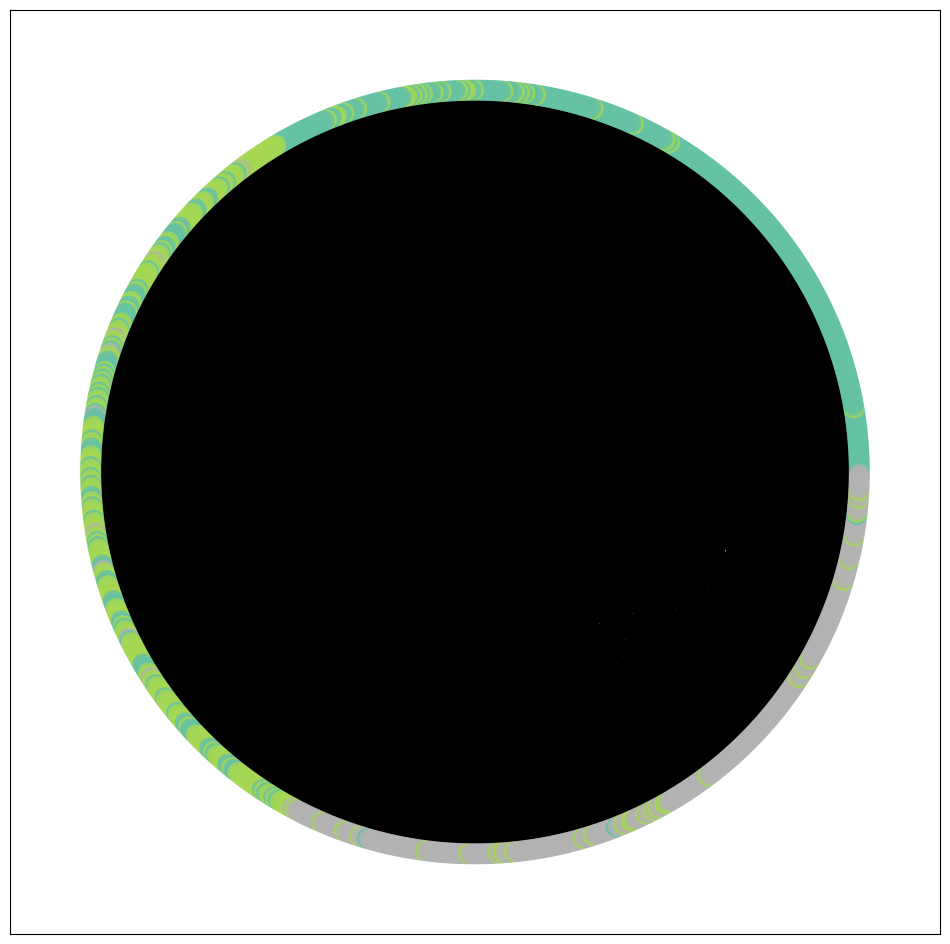

In [9]:
visualize(graph_model_output_nx, predicted_labels)